In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### 1. Load data file using pandas

In [3]:
inp0 = pd.read_csv('googleplaystore.csv')

In [4]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### 2. Check for null values in the data. Get the number of null values for each column.

In [6]:
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### 3. Drop records with nulls in any of the columns

In [7]:
inp0.dropna(how = 'any', inplace = True)

In [8]:
# confirming that the null records are dropped
inp0.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them:

In [9]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Price column needs to be cleaned

In [10]:
inp0['Price'].value_counts()[:5]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

Some have dollars, some have 0
- we need to conditionally handle this
- first, let's modify the column to take 0 if value is 0, else take the first letter onwards

In [11]:
inp0['Price'] = inp0['Price'].map(lambda x : 0 if x == '0' else float(x[1:]))

The other columns with numeric data are - 
1. Reviews
2. Installs
3. Size

In [12]:
inp0['Reviews'] = inp0['Reviews'].astype('int32')

In [13]:
inp0['Reviews'].describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [14]:
inp0['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [15]:
def clean_installs(val):
    return int(val.replace(',',"").replace("+",""))

In [33]:
inp0['Installs'] = inp0['Installs'].apply(clean_installs)

In [34]:
inp0['Installs'].describe()

count    8.892000e+03
mean     6.262446e+06
std      3.538610e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [35]:
inp0['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [37]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return (x)
    if 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return (x)
    else:
        return None

In [38]:
inp0['Size'] = inp0['Size'].apply(change_size)

In [39]:
inp0['Size'].describe()

count      7489.000000
mean      22021.694151
std       22575.790119
min           8.500000
25%        5100.000000
50%       14000.000000
75%       31000.000000
max      100000.000000
Name: Size, dtype: float64

In [40]:
inp0['Size'].fillna(method = 'ffill', inplace=True)

5. Sanity checks:

In [41]:
inp0['Rating'].describe()

count    8892.000000
mean        4.180139
std         0.524259
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Min is 1 and max is 5. Looks good.

2. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.



In [43]:
inp0[inp0['Reviews'] > inp0['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [44]:
len(inp0[inp0['Reviews'] > inp0['Installs']])

7

In [47]:
inp0 = inp0[inp0['Reviews'] <= inp0['Installs']]

In [48]:
inp0.shape

(8885, 13)

3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [49]:
inp0[(inp0['Type'] == 'Free') & (inp0['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


5. Performing univariate analysis: 

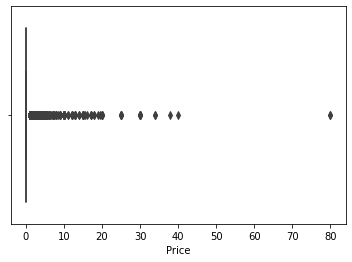

In [50]:
sns.boxplot(inp0['Price'])
plt.show()

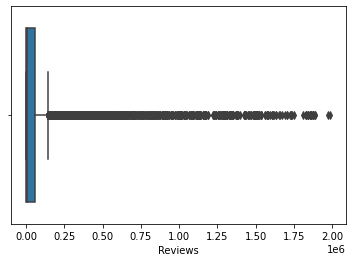

In [51]:
sns.boxplot(inp0['Reviews'])
plt.show()

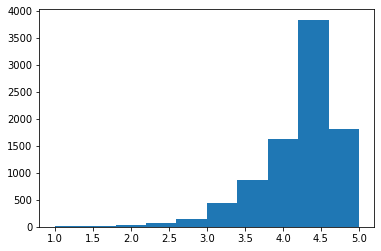

In [52]:
plt.hist(inp0['Rating'])
plt.show()

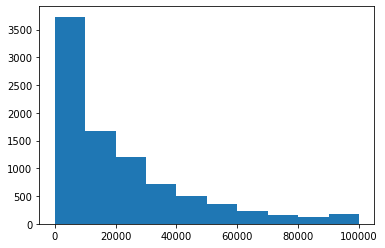

In [53]:
plt.hist(inp0['Size'])
plt.show()

6. Outlier treatment: 

    Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

In [54]:
inp0[inp0['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [55]:
len(inp0[inp0['Price'] > 200])

0

Drop these as most seem to be junk apps

In [56]:
inp0 = inp0[inp0['Price'] <= 200]

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [57]:
inp0 = inp0[inp0['Reviews'] <= 2000000]

In [58]:
inp0.shape

(8885, 13)

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis

1. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [59]:
inp0['Installs'].quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

2. Decide a threshold as cutoff for outlier and drop records having values more than that

In [60]:
inp0 = inp0[inp0.Installs < 1000000000].copy()
inp0.shape

(8879, 13)

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

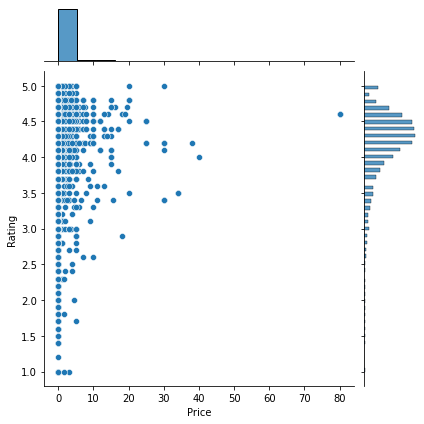

In [61]:
sns.jointplot(inp0['Price'], inp0['Rating'])

    * No Relation b/w Price & Rating

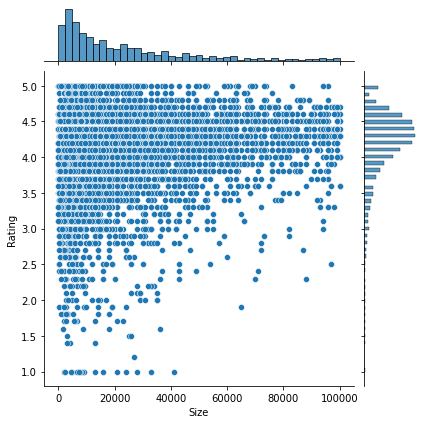

In [62]:
sns.jointplot(inp0['Size'], inp0['Rating'])

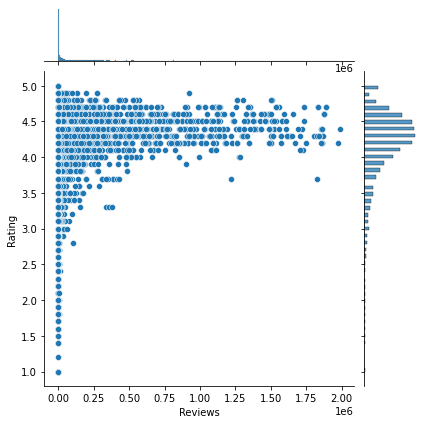

In [63]:
sns.jointplot(inp0['Reviews'], inp0['Rating'])

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

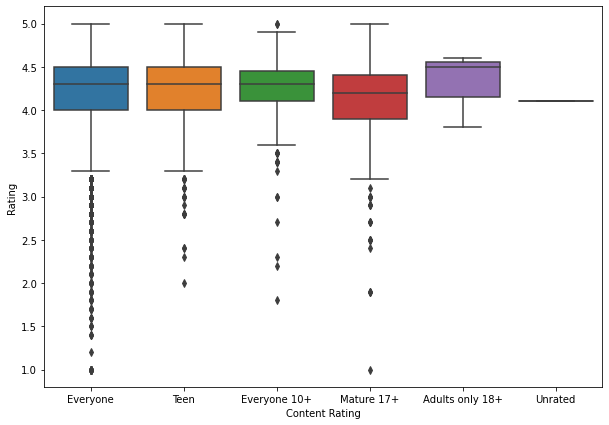

In [66]:
plt.figure(figsize=[10,7])
sns.boxplot(inp0['Content Rating'], inp0['Rating'])

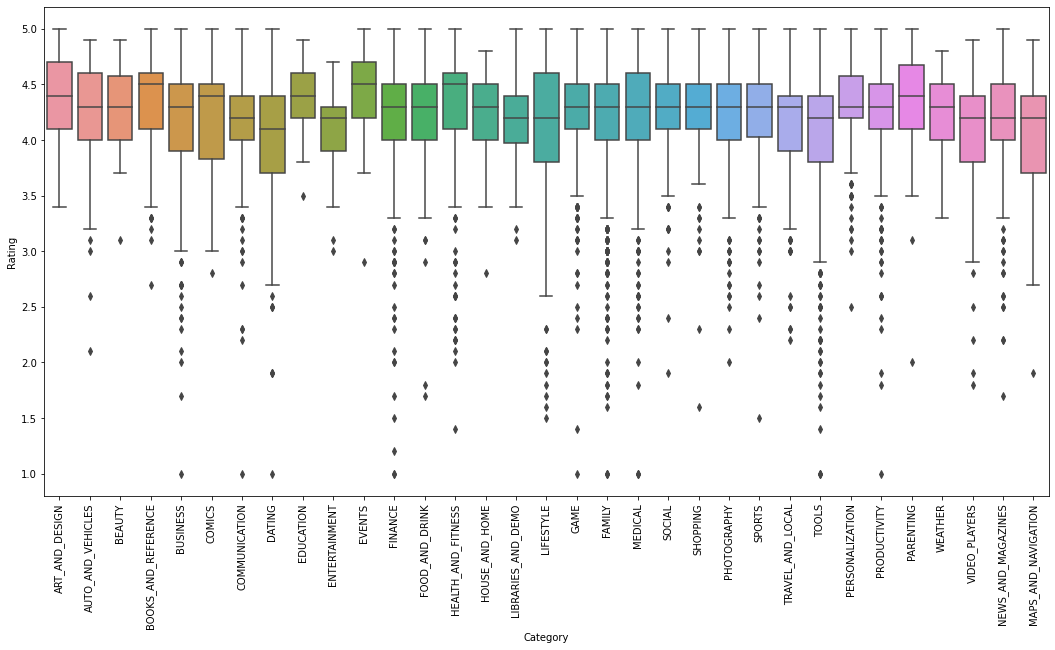

In [65]:
plt.figure(figsize=[18,9])
sns.boxplot(inp0['Category'], inp0['Rating'])
plt.xticks(rotation = 90)
plt.show()

8. Data preprocessing

In [67]:
inp1 = inp0.copy()

In [68]:
# convert large range numbers to log
inp1.Installs = inp1.Installs.apply(np.log1p)

In [69]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

Getting dummy variables for Category, Genres, Content Rating

In [70]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [71]:
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)

In [73]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8879 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8879 non-null   object 
 1   Rating          8879 non-null   float64
 2   Reviews         8879 non-null   float64
 3   Size            8879 non-null   float64
 4   Installs        8879 non-null   float64
 5   Type            8879 non-null   object 
 6   Price           8879 non-null   float64
 7   Content Rating  8879 non-null   object 
 8   Genres          8879 non-null   object 
dtypes: float64(5), object(4)
memory usage: 1013.7+ KB


In [75]:
# To handle multiple categorical values
inp2 = pd.get_dummies(inp1)

In [76]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,4.744932,3600.0,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [77]:
from sklearn.model_selection import train_test_split

In [79]:
X = inp2.drop(['Rating'], axis = 1)
Y = inp2['Rating']

10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 6)

11 . Model building

Use linear regression as the technique

Report the R2 on the train set

In [81]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [83]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [84]:
# r2 - R-Squared performance metric of regression
lin_reg.score(x_test, y_test)

0.1743908300538789

12. Make predictions on test set and report R2.